# Datawhale 零基础入门数据挖掘-Task2 数据分析

## EDA主要目标
1. 了解数据集，熟悉数据集。数据集数据特征的数据形式，是离散特征，还是连续特征，构成比例是怎么样的。

2. 对数据进行一些探索性的分析。观察变量之间的相会关系以及变量与预测值之间的存在关系。

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from collections import Counter
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

## 2.1 载入数据并简略观察

In [9]:
train_data = pd.read_csv('/Users/benjamin/study/data complete/天池/二手车交易价格预测/data/used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv('/Users/benjamin/study/data complete/天池/二手车交易价格预测/data/used_car_testA_20200313.csv', sep=' ')
print('训练数据集大小：', train_data.shape)
print('测试数据集大小：', test_data.shape)
train_data.head()

训练数据集大小： (150000, 31)
测试数据集大小： (50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [10]:
test_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,0,0,20160329,49.593127,5.246568,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,0,0,20160404,42.395926,-3.253950,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,0,0,20160308,45.841370,4.704178,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,0,0,20160325,46.440649,4.319155,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,0,0,20160309,42.184604,-3.166234,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


## 2.2 总揽数据概况

In [14]:
## 通过 `info()` 查看数据类型
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

**发现 `notRepairedDamage` 为object类型，后续可以观察下该特征不同值的统计量**

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

In [16]:
# 通过describe() 来熟悉数据的相关统计量
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


**发现seller最小值，2分位，3分位数据均为0，数据严重倾斜；offerType 全部数值均为0, 没有意义。可以删掉**

In [28]:
train_data['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [31]:
train_data.offerType.value_counts()

0    150000
Name: offerType, dtype: int64

In [17]:
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,2590.604820,0.0,0.0,2.016033e+07,44.418233,-0.037238,0.050534,0.084640,0.015001,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,1876.970263,0.0,0.0,7.951521e+01,2.429950,3.642562,2.856341,2.026510,1.193026,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.015061e+07,28.987024,-4.137733,-4.205728,-5.638184,-4.287718,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1030.000000,0.0,0.0,2.016031e+07,43.139621,-3.191909,-0.971266,-1.453453,-0.928089,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,2219.000000,0.0,0.0,2.016032e+07,44.611084,-3.050756,-0.388117,0.097881,-0.070225,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3857.000000,0.0,0.0,2.016033e+07,45.992639,3.997323,0.240548,1.562700,0.863731,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,8121.000000,0.0,0.0,2.016041e+07,51.751684,7.553517,18.394570,9.381599,5.270150,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [29]:
test_data['seller'].value_counts()

0    50000
Name: seller, dtype: int64

In [32]:
test_data.offerType.value_counts()

0    50000
Name: offerType, dtype: int64

In [34]:
del train_data['seller']
del train_data['offerType']
del test_data['seller']
del test_data['offerType']

## 2.3 检查数据缺失和异常值情况

### 2.3.1 观察缺省值

In [19]:
# 查看每列的空值
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [20]:
test_data.isna().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

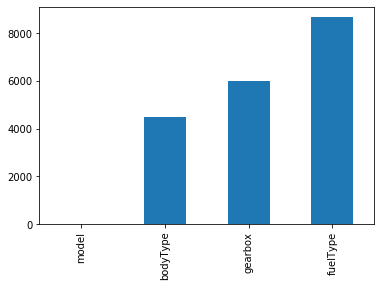

In [21]:
## 可视化nan
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

通过直观地了解哪些列存在空值，空值个数是否比较大。如果比较小，可以选择填充；如果是cart树或lgb等树模型可以直接空缺，让模型自己去优化；如果空值比较多，可以考虑删掉对应的特征

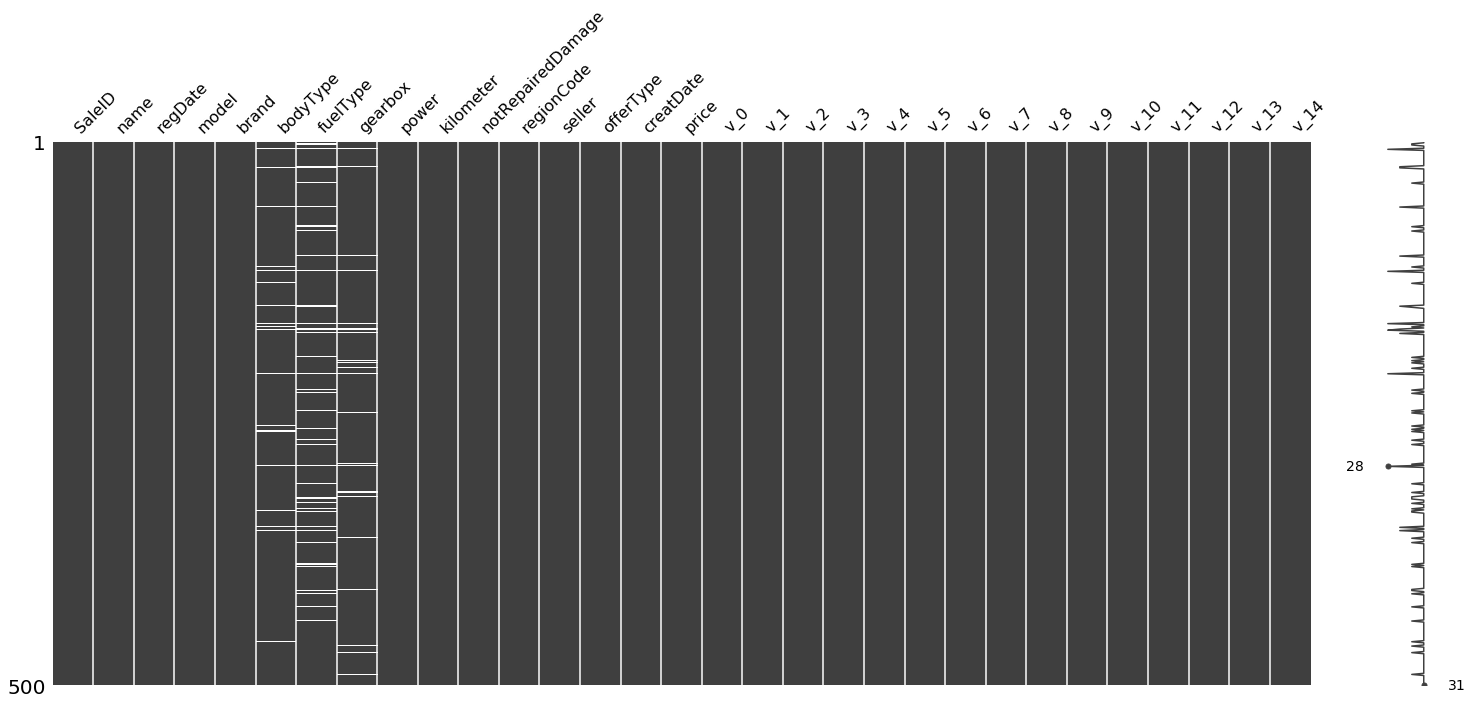

In [22]:
# 通过missingno可视化空值
msno.matrix(train_data.sample(500))

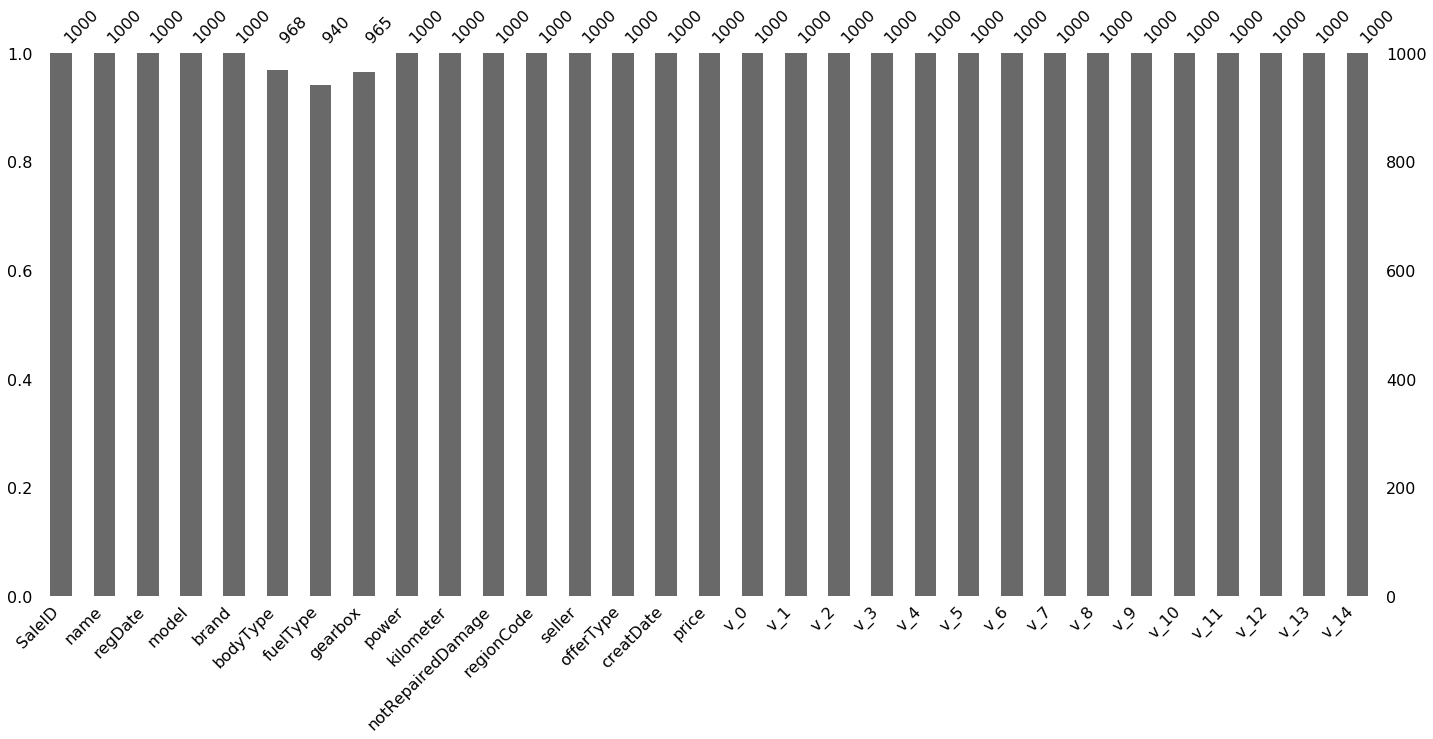

In [23]:
msno.bar(train_data.sample(1000))

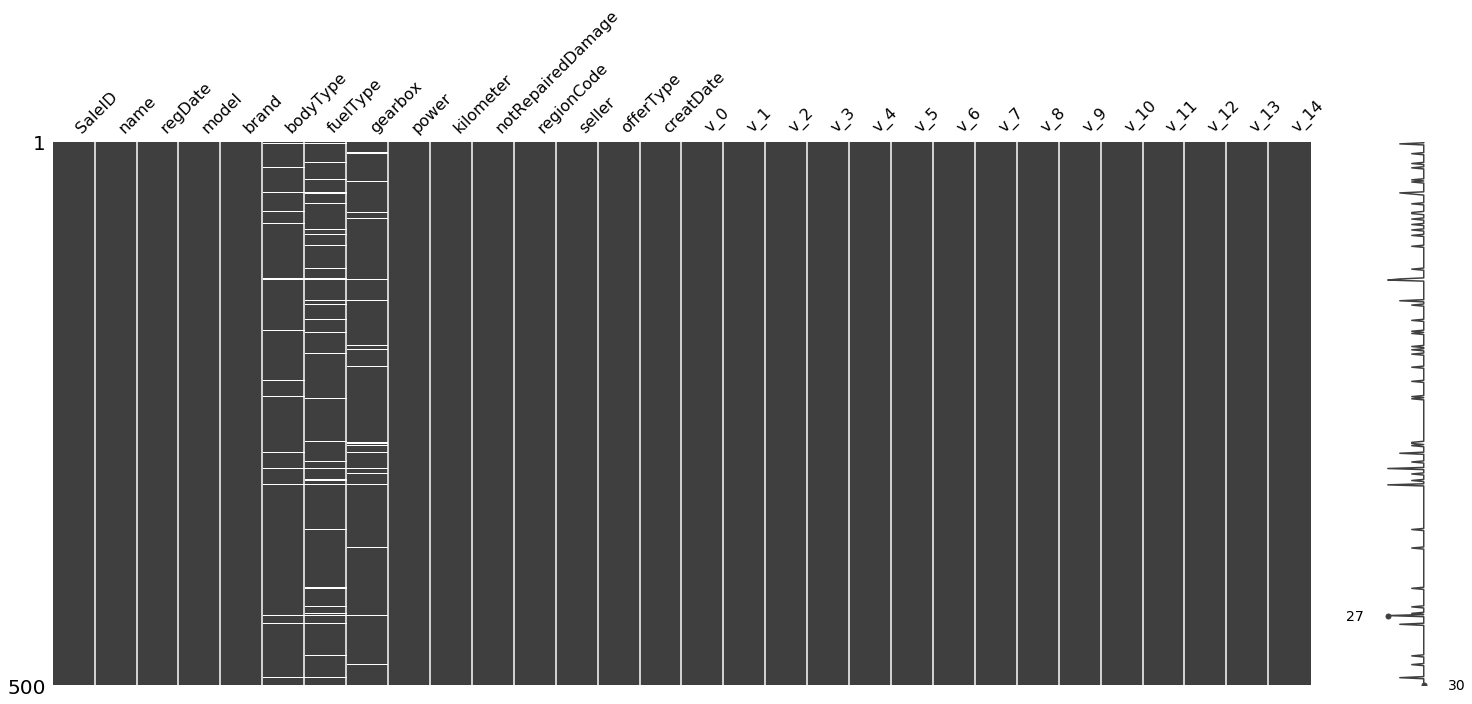

In [24]:
msno.matrix(test_data.sample(500))

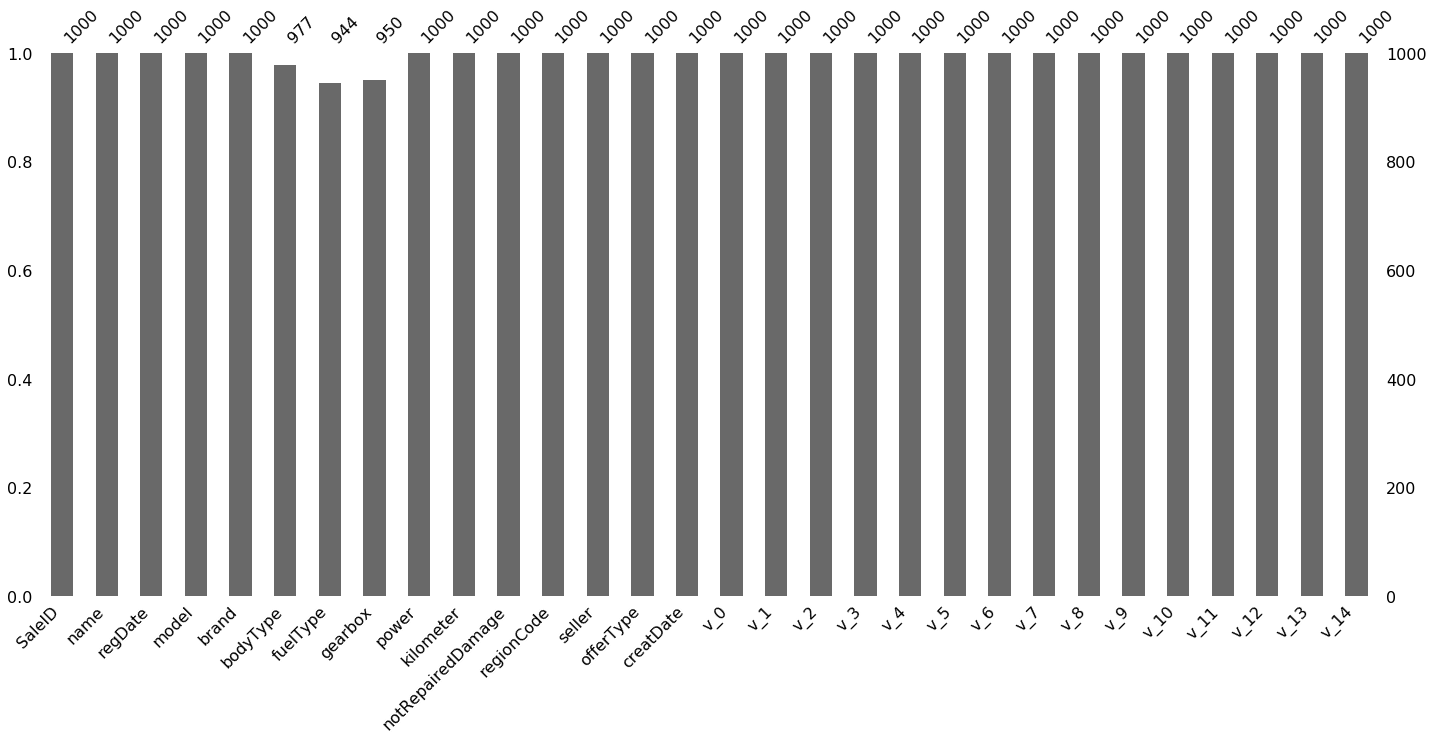

In [25]:
msno.bar(test_data.sample(1000))

观察到训练集有4列有缺省值，测试集有3列有缺省值。
### 2.3.2 观察异常值

前面通过info()观察数据类型时，发现数据中 notRepairedDamage 为object类型。观察下不同值的统计量

In [26]:
train_data.notRepairedDamage.value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

可以看出来 '-' 也为空值，将它替换为None

In [36]:
train_data.notRepairedDamage.replace('-', np.nan, inplace=True)
test_data.notRepairedDamage.replace('-', np.nan, inplace=True)

In [51]:
test_data.notRepairedDamage = test_data.notRepairedDamage.map(
    lambda x: float(x) if x is not None else x)
train_data.notRepairedDamage = train_data.notRepairedDamage.map(
    lambda x: float(x) if x is not None else x)

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    125676 non-null float64
regionCode           150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4                  150000 non-null float64
v_5                  150000 non-null float64
v_6  

In [37]:
train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [38]:
test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage    8031
regionCode              0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

### 2.3.3 了解预测值分布情况

In [39]:
train_data.price

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [40]:
train_data.price.value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

## 不做特征工程使用lightgbm进行训练，看测试效果

In [53]:
columns = train_data.columns
feature_columns = columns.tolist()
feature_columns.remove('price')
label_column = 'price'
features = train_data[feature_columns]
labels = train_data[['price']]
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.3)

In [44]:
xgb_model = XGBRegressor()
lgb_model = LGBMRegressor()

In [55]:
lgb_model.fit(train_x, train_y, eval_metric='l2', eval_set=[(test_x, test_y)])

<class 'list'>
[1]	valid_0's l2: 4.69043e+07
<class 'list'>
[2]	valid_0's l2: 3.92056e+07
<class 'list'>
[3]	valid_0's l2: 3.29408e+07
<class 'list'>
[4]	valid_0's l2: 2.78018e+07
<class 'list'>
[5]	valid_0's l2: 2.36031e+07
<class 'list'>
[6]	valid_0's l2: 2.01553e+07
<class 'list'>
[7]	valid_0's l2: 1.73147e+07
<class 'list'>
[8]	valid_0's l2: 1.49622e+07
<class 'list'>
[9]	valid_0's l2: 1.30317e+07
<class 'list'>
[10]	valid_0's l2: 1.13932e+07
<class 'list'>
[11]	valid_0's l2: 1.00451e+07
<class 'list'>
[12]	valid_0's l2: 8.9374e+06
<class 'list'>
[13]	valid_0's l2: 8.01603e+06
<class 'list'>
[14]	valid_0's l2: 7.24255e+06
<class 'list'>
[15]	valid_0's l2: 6.59226e+06
<class 'list'>
[16]	valid_0's l2: 6.05576e+06
<class 'list'>
[17]	valid_0's l2: 5.57595e+06
<class 'list'>
[18]	valid_0's l2: 5.16567e+06
<class 'list'>
[19]	valid_0's l2: 4.81963e+06
<class 'list'>
[20]	valid_0's l2: 4.52656e+06
<class 'list'>
[21]	valid_0's l2: 4.28244e+06
<class 'list'>
[22]	valid_0's l2: 4.07152e+0

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [56]:
xgb_model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

In [57]:
predict_lgb = lgb_model.predict(test_x)
predict_xgb = xgb_model.predict(test_x)

In [58]:
print('lgb: ',str(mean_absolute_error(test_y, predict_lgb)))
print('xgb', str(mean_absolute_error(test_y, predict_xgb)))

lgb:  702.2411014972247
xgb 868.4935407146666
